<a href="https://colab.research.google.com/github/moriahsantiago/moriahsantiago/blob/main/M3_Data_and_Measurement_Validity_Exploratory_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1. Instrumental Variables with R
* Before you start, make sure you're using R for this activity by going to Runtime > Change Runtime type > R

## I. Introduction
This tutorial provides a simple example of IVE. Estimates of the ATE are computed using two-stage least squares.

## II. Data
We will use the "CollegeDistance" data set, which is part of the AER package. This package contains several datasets that correspond with the Applied Econometrics with R textbook by Christian Kleiber and
Achim Zeileis. The dataset contains data from a survey of high school graduates with information on wages,
education, average tuition, and multiple demographic variables.
We are interested in estimating the effect of a student’s education on his/her wages. However, there is a selection bias because students cannot be randomly assigned to a specific education level. We will use distance
from a college as an IV in estimating the effect of education on wages. The idea is that distance affects a person’s future wages by affecting the person’s decision to pursue a college degree.

In [2]:
knitr::opts_chunk$set(echo = TRUE)

In [3]:
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
install.packages("lme4")
install.packages("pbkrtest")
install.packages("car")
install.packages("AER")
install.packages("lmtest")
install.packages("ivreg")

installed_packages <- installed.packages()[,1]
required_packages <- c("AER", "lmtest", "ivreg", "car", "lme4", "pbkrtest")

# Check which required packages are installed
setdiff(required_packages, installed_packages)

library(AER)
library(lmtest)
library(ivreg)
library(car)
library(lme4)
library(pbkrtest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



character(0)

Loading required package: car

Loading required package: carData

Loading required package: sandwich

Loading required package: survival

Registered S3 methods overwritten by 'ivreg':
  method              from
  anova.ivreg         AER 
  hatvalues.ivreg     AER 
  model.matrix.ivreg  AER 
  predict.ivreg       AER 
  print.ivreg         AER 
  print.summary.ivreg AER 
  summary.ivreg       AER 
  terms.ivreg         AER 
  update.ivreg        AER 
  vcov.ivreg          AER 


Attaching package: ‘ivreg’


The following objects are masked from ‘package:AER’:

    ivreg, ivreg.fit


Loading required package: Matrix



## III. Two Stage Least Squares
The following code demonstrates the idea of two stage least squares.

In [11]:
data("CollegeDistance", package = "AER")
library(AER)

m1 <- lm(education ~ distance, data=CollegeDistance)

CollegeDistance$ed.pred <- predict(m1)

m2 <- lm(wage ~ ed.pred,data=CollegeDistance)

summary(m2)


Call:
lm(formula = wage ~ ed.pred, data = CollegeDistance)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9109 -0.6507  0.1794  0.6494  3.4611 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.457076   1.616321   5.851 5.22e-09 ***
ed.pred     0.003145   0.117050   0.027    0.979    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.343 on 4737 degrees of freedom
Multiple R-squared:  1.524e-07,	Adjusted R-squared:  -0.000211 
F-statistic: 0.0007221 on 1 and 4737 DF,  p-value: 0.9786


## IV. Using ivreg
We can also derive estimates of the ATE using the ivreg function. The IV are listed after the vertical bar.

In [12]:
m3 <- ivreg(wage ~ education|distance,data=CollegeDistance)

summary(m3)


Call:
ivreg(formula = wage ~ education | distance, data = CollegeDistance)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9205 -0.6480  0.1852  0.6520  3.4652 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.457076   1.616174   5.852  5.2e-09 ***
education   0.003145   0.117040   0.027    0.979    

Diagnostic tests:
                  df1  df2 statistic p-value    
Weak instruments    1 4737    41.492 1.3e-10 ***
Wu-Hausman          1 4736     0.016   0.899    
Sargan              0   NA        NA      NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.343 on 4737 degrees of freedom
Multiple R-Squared: 0.0001824,	Adjusted R-squared: -2.869e-05 
Wald test: 0.0007222 on 1 and 4737 DF,  p-value: 0.9786 



## V. Covariates as instruments
In the following code, covariates entered in the first stage are considered ``instruments." Note that the ivreg function used here is from the AER package.

In [29]:
m4 <- ivreg(wage ~ urban + gender + ethnicity + unemp +
              education|distance+urban + gender + ethnicity + unemp,
            data = CollegeDistance)

summary(m4)


Call:
ivreg(formula = wage ~ urban + gender + ethnicity + unemp + education | 
    distance + urban + gender + ethnicity + unemp, data = CollegeDistance)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.20896 -1.14578 -0.02361  1.33303  4.77571 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.35903    1.90830  -0.188   0.8508    
urbanyes           0.04614    0.06039   0.764   0.4449    
genderfemale      -0.07075    0.04997  -1.416   0.1569    
ethnicityafam     -0.22724    0.09863  -2.304   0.0213 *  
ethnicityhispanic -0.35129    0.07706  -4.559 5.28e-06 ***
unemp              0.13916    0.00912  15.259  < 2e-16 ***
education          0.64710    0.13594   4.760 1.99e-06 ***

Diagnostic tests:
                  df1  df2 statistic  p-value    
Weak instruments    1 4732     50.31 1.51e-12 ***
Wu-Hausman          1 4731     41.12 1.57e-10 ***
Sargan              0   NA        NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘

## VI. Adding covariates
To enter covariates (not as instruments), we will use the ivreg function from the \textsc{ivreg} package.

In [30]:
m5 <- ivreg::ivreg(wage ~ urban + gender + ethnicity + unemp|education|distance + urban + gender + ethnicity + unemp, data=CollegeDistance)

summary(m5)


Call:
ivreg::ivreg(formula = wage ~ urban + gender + ethnicity + unemp | 
    education | distance + urban + gender + ethnicity + unemp, 
    data = CollegeDistance)

Residuals:
     Min       1Q   Median       3Q      Max 
-5.20896 -1.14578 -0.02361  1.33303  4.77571 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -0.35903    1.90830  -0.188   0.8508    
education          0.64710    0.13594   4.760 1.99e-06 ***
urbanyes           0.04614    0.06039   0.764   0.4449    
genderfemale      -0.07075    0.04997  -1.416   0.1569    
ethnicityafam     -0.22724    0.09863  -2.304   0.0213 *  
ethnicityhispanic -0.35129    0.07706  -4.559 5.28e-06 ***
unemp              0.13916    0.00912  15.259  < 2e-16 ***

Diagnostic tests:
                  df1  df2 statistic  p-value    
Weak instruments    1 4732     50.31 1.51e-12 ***
Wu-Hausman          1 4731     41.12 1.57e-10 ***
Sargan              0   NA        NA       NA    
---
Signif. codes:  0 ‘

# Part 2. Matching with R


# I. Introduction

## The Data Set

In this tutorial, we will be working with the Early Childhood Longitudinal Study (ECLS).

- In the following analyses, we will examine the effect of going to Catholic school ("treatment") versus public school ("control") on mathematics achievement.

## Load packages.

We will use the following packages in R. If you do not have the packages installed, run the command ``install.packages(name of package)" first.

Then, load them into your console by running

In [31]:
install.packages("MatchIt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(MatchIt)
library(dplyr)

In [33]:
ecls <- read.csv("ecls.csv", header = TRUE)
head(ecls)

,childid,catholic,race,race_white,race_black,race_hispanic,race_asian,p5numpla,p5hmage,p5hdage,⋯,w3daded_hsb,w3momed_hsb,w3momscr,w3dadscr,w3inccat,w3income,w3povrty,p5fstamp,c5r2mtsc,c5r2mtsc_std
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,0001002C,0,"WHITE, NON-HISPANIC",1,0,0,0,1,47,45,⋯,0,0,53.50,77.5,"$50,001 TO $75,000",62500.5,0,0,60.043,0.9817533
2,0001004C,0,"WHITE, NON-HISPANIC",1,0,0,0,1,41,48,⋯,0,0,34.95,53.5,"$40,001 TO $50,000",45000.5,0,0,56.280,0.5943775
3,0001005C,0,"WHITE, NON-HISPANIC",1,0,0,0,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,53.791,0.3381515
4,0001010C,0,"WHITE, NON-HISPANIC",1,0,0,0,1,43,55,⋯,0,0,63.43,53.5,"$50,001 TO $75,000",62500.5,0,0,55.272,0.4906106
5,0001011C,1,"WHITE, NON-HISPANIC",1,0,0,0,1,38,39,⋯,0,0,53.50,53.5,"$75,001 TO $100,000",87500.5,0,0,64.604,1.4512779
6,0001012C,0,"WHITE, NON-HISPANIC",1,0,0,0,1,47,57,⋯,0,0,61.56,77.5,"$100,001 TO $200,000",150000.5,0,0,75.721,2.5956991


# II. Analysis using non-matched data

## Difference in means using the outcome variable.
Because students who attend Catholic or public school often self-select or choose to attend these schools, we have a problem of non-equivalent comparison groups.

- Let's first compare the average math achievement scores between Catholic and public school students without matching.

- The variable \textbf{c5r2mtsc\_std} is the students' standardized math score with a mean of 0 and standard deviation of 1. Because this name is long and easy
to misspell, we will duplicate this variable and rename it ``math."

- The independent variable of interest is \textbf{catholic} (1 = student went to Catholic school; 0 = student went to public school).

In [34]:
ecls$math <- ecls$c5r2mtsc_std

ecls %>%
  group_by(catholic) %>%

summarise(n_students=n(),
          mean_math=mean(c5r2mtsc_std),
          std_error = sd(c5r2mtsc_std)/sqrt(n_students))

catholic,n_students,mean_math,std_error
<int>,<int>,<dbl>,<dbl>
0,9568,-0.03059583,0.01038536
1,1510,0.19386817,0.02235282


- The \%>\% is a function that passes the data through the \textbf{group\_by} function. We use it to group the students by Catholic/public schools.

- \textbf{summarise()} provides a summary of the variables.

## Is the average math score among Catholic school students significantly different than the average math score among public school students?

- We can test this hypothesis using a two-sample t-test. This is done as follows.

In [35]:
with(ecls,t.test(c5r2mtsc_std ~ catholic))


	Welch Two Sample t-test

data:  c5r2mtsc_std by catholic
t = -9.1069, df = 2214.5, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.2727988 -0.1761292
sample estimates:
mean in group 0 mean in group 1 
    -0.03059583      0.19386817 


## Difference in means: pre-treatment covariates

Consider the following covariates:

- \textbf{race\_white} : Is the student white (1) or not (0)?

- \textbf{p5hmage}: Mother's age

- \textbf{w3income}: Family income

- \textbf{p5numpla}: Number of places the student has lived for at least 4 months

- \textbf{w3momed\_hsb}: Is the mother's education level high-school or below (1) or some college or more (0)?

## Calculate the mean for each covariate by school type.

In [37]:
ecls %>%
  group_by(catholic) %>%
  summarise(across(c(race_white, p5hmage, w3income, p5numpla, w3momed_hsb),
                   ~ mean(.x, na.rm = TRUE)),
            .groups = 'drop') %>%
  as.data.frame()

catholic,race_white,p5hmage,w3income,p5numpla,w3momed_hsb
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.5561246,37.56097,54889.16,1.132669,0.4640918
1,0.7251656,39.57516,82074.30,1.092701,0.2272069


## Test whether the covariate means are significantly different from each other using a t-test.

In [38]:
lapply(ecls_cov, function(v) {
    t.test(ecls[, v] ~ ecls[, 'catholic'])
})

[[1]]

	Welch Two Sample t-test

data:  ecls[, v] by ecls[, "catholic"]
t = -13.453, df = 2143.3, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.1936817 -0.1444003
sample estimates:
mean in group 0 mean in group 1 
      0.5561246       0.7251656 


[[2]]

	Welch Two Sample t-test

data:  ecls[, v] by ecls[, "catholic"]
t = -12.665, df = 2186.9, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.326071 -1.702317
sample estimates:
mean in group 0 mean in group 1 
       37.56097        39.57516 


[[3]]

	Welch Two Sample t-test

data:  ecls[, v] by ecls[, "catholic"]
t = -20.25, df = 1825.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -29818.10 -24552.18
sample estimates:
mean in group 0 m

- The code above conducts a t-test for each covariate in the order of the \textbf{ecls\_cov} vector. You can also do the t-tests individually using the following code:


# III. Matching

## Nearest-Neighbor Matching

Suppose we wanted to match the Catholic and public school students based on the family income covariate, \textbf{w3income}.

- To match students, we use the package \textsc{MatchIt} in R.

- However, MatchIt does not allow missing values and there are missing values for certain variables in the ECLS data. We first remove them using the following code.

In [39]:
ecls2 <- ecls %>%
  select(math, catholic, one_of(ecls_cov)) %>%
  na.omit()


- The code above removes all the missing values for the covariates in \textbf{ecls\_cov}.


In [40]:
ecls_nearest <- matchit(catholic ~ w3income, family = "binomial", method = "nearest", caliper = 0.25,
                      data = ecls2)

- Assess the matches under nearest neighbor matching as follows


Call:
matchit(formula = catholic ~ w3income, data = ecls2, method = "nearest", 
    caliper = 0.25, family = "binomial")

Summary of Balance for All Data:
         Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance          0.18        0.1401          0.4733     1.3553    0.1565
w3income      82568.94    55485.0210          0.5777     1.1373    0.1565
         eCDF Max
distance   0.3062
w3income   0.3062

Summary of Balance for Matched Data:
         Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance          0.18          0.18               0          1         0
w3income      82568.94      82568.94               0          1         0
         eCDF Max Std. Pair Dist.
distance        0               0
w3income        0               0

Sample Sizes:
          Control Treated
All          7915    1352
Matched      1352    1352
Unmatched    6563       0
Discarded       0       0


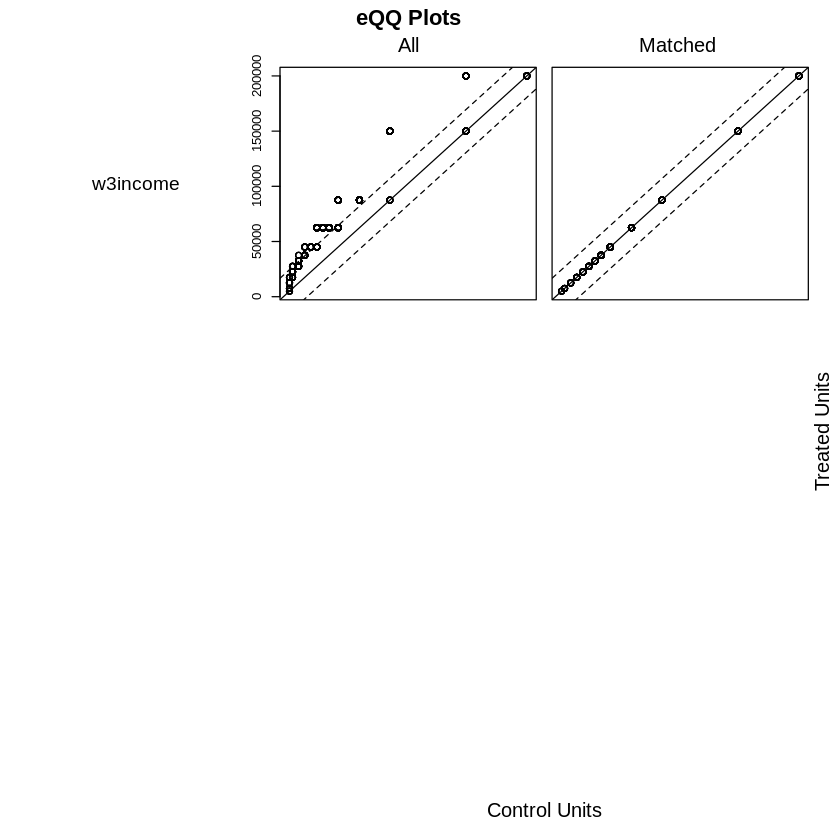

In [41]:
summary(ecls_nearest)

plot(ecls_nearest)

- The QQ plot given by the \textbf{plot} command determines whether the samples come from the same distribution. After matching, we should see the points lie on the 45 degree line.

- We can also create a data frame with only the matched observations from nearest neighbor matching using the \textbf{match.data()} function:

In [42]:
ecls_nearest_matched <- match.data(ecls_nearest)

dim(ecls_nearest_matched)

[1] 2704   10

- Note that only 2704 students were matched.


- To assess whether matching was effective, we provide the means of the matching covariate.

In [43]:
ecls_nearest_matched %>%
  group_by(catholic) %>%
  summarise(mean_income = mean(w3income)) %>%
  as.data.frame()

catholic,mean_income
<int>,<dbl>
0,82568.94
1,82568.94


- Another way of assessing the matches is by conducting a t-test

In [44]:
with(ecls_nearest_matched,t.test(w3income ~ catholic))


	Welch Two Sample t-test

data:  w3income by catholic
t = 0, df = 2702, p-value = 1
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -3535.739  3535.739
sample estimates:
mean in group 0 mean in group 1 
       82568.94        82568.94 


## Matching using the Mahalanobis distance

- When we match students based on a vector of covariates (more than one), the Mahalanobis distance offers another type of distance criterion based on a caliper to judge matches.

- Suppose we match on all five of the covariates described earlier (race, mother's age, family income, number of places the student has lived, and mother's education level).

In [45]:
ecls_mahala <- matchit(catholic ~ race_white + p5hmage + w3income + p5numpla + w3momed_hsb,
                       family = "binomial", distance = "mahalanobis",data = ecls2)

- Retrieve the matched data set:

In [46]:
ecls_mahala_matched <- match.data(ecls_mahala)

- If you would like to base your matches on a specific caliper, enter the \textbf{caliper} argument in the \textbf{matchit} function.

## Matching using a propensity score

- A propensity score is a summary univariate measure of the covariates used in matching students from the treatment and control groups.

- We can estimate the propensity scores and perform the matching using the same five covariates as under the Mahalanobis distance.

In [47]:
ecls_propensity <- matchit(catholic ~ race_white + p5hmage + w3income + p5numpla + w3momed_hsb,
                       family = "binomial",data=ecls2)

ecls_propensity_matched <- match.data(ecls_propensity)

#### QQ plots to assess balance

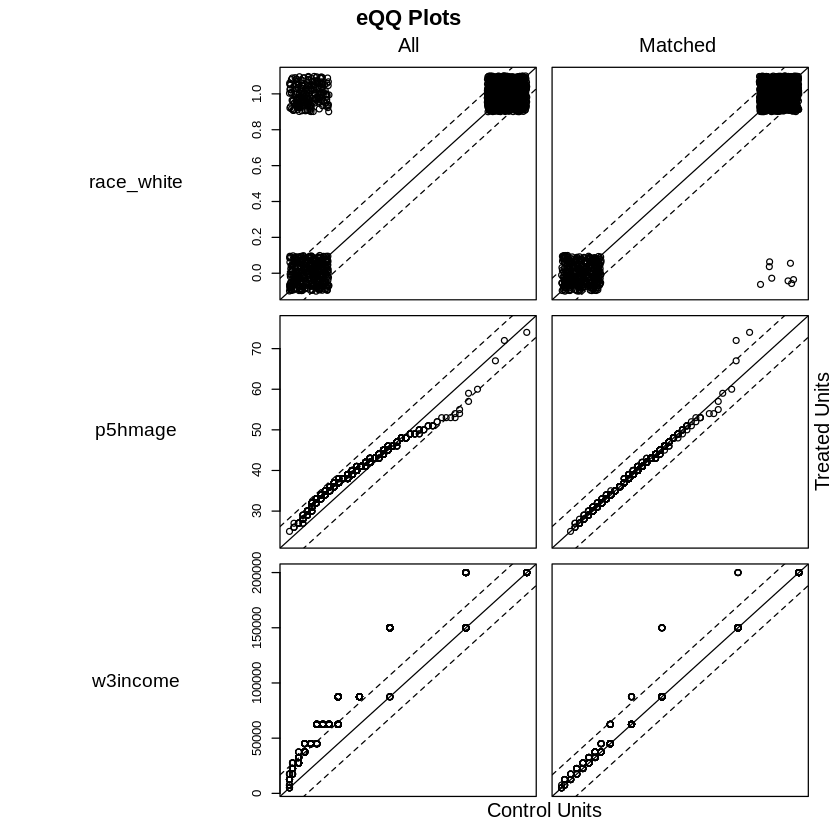

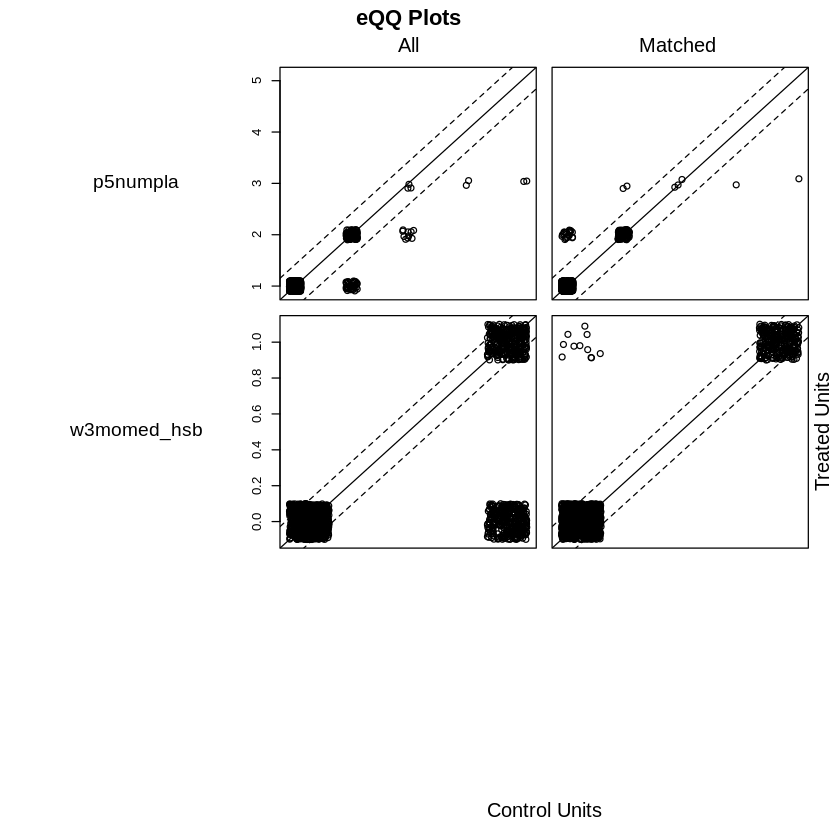

In [48]:
plot(ecls_propensity)

#### Histograms to assess balance

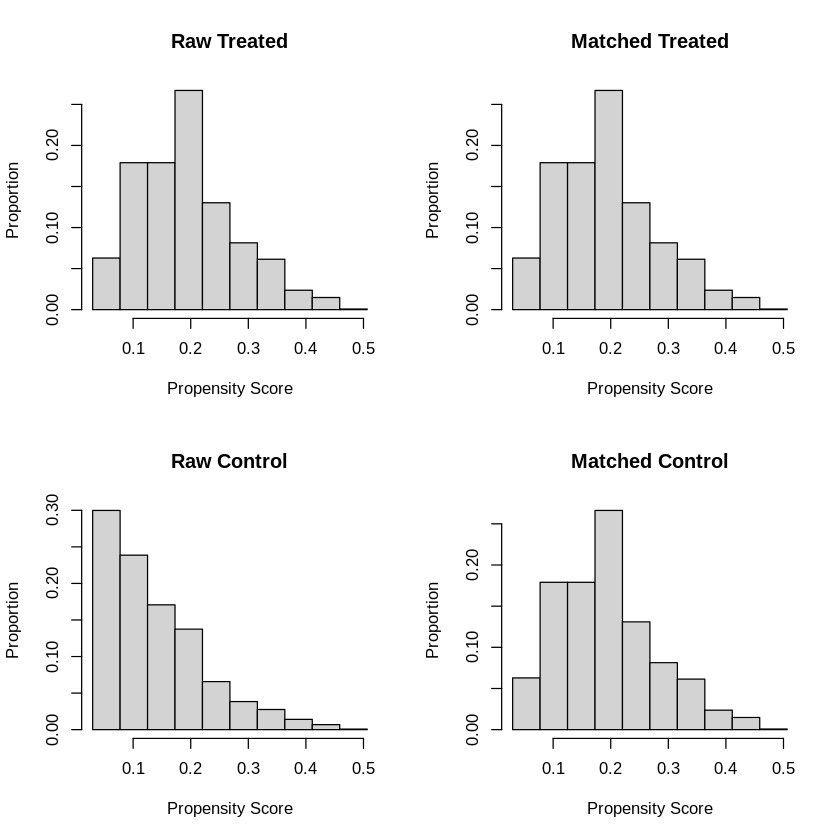

In [49]:
plot(ecls_propensity,type="hist")

### Jitter plots to assess balance

To identify the units, use first mouse button; to stop, use second.


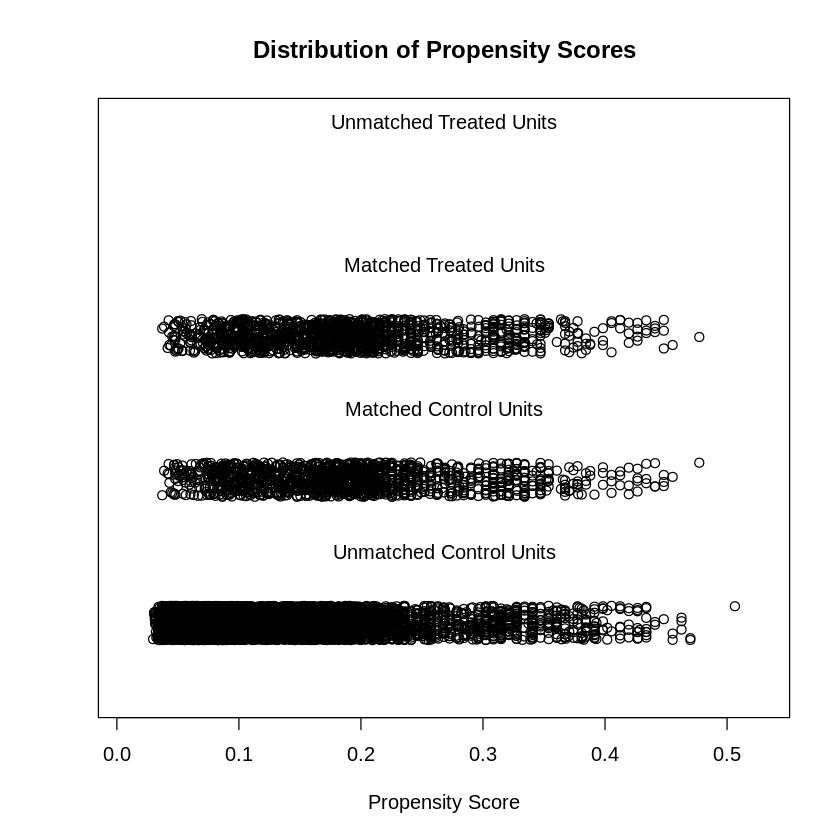

In [50]:
plot(ecls_propensity,type="jitter")